* **Sentiment Analysis of Amozon product review:**

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral."

Here we are using NLTK's VADER module, which provides sentiment scores based on words.


In [ ]:
#Import libraries:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#Reading the data:

data = pd.read_csv("/content/amazonreviews.tsv",sep='\t')
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


neg    5097
pos    4903
Name: label, dtype: int64


Text(0, 0.5, 'Count')

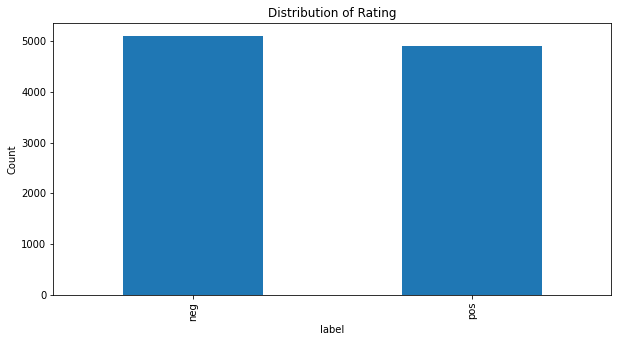

In [ ]:
#Visualising data graphically:

print(data['label'].value_counts())
fig = plt.figure(figsize = (10, 5))
data['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('label')
plt.ylabel('Count')


* **Method 1: Using Vader Module:**

In [ ]:
# importing Vader modules:

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Figuring out how Vader is giving the sentiment score on single review:

firstReview = data['review'][0]
print(firstReview)
sid.polarity_scores(firstReview)

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


{'compound': 0.9454, 'neg': 0.088, 'neu': 0.669, 'pos': 0.243}

In [ ]:
#Adding sentiment score of all review on different column:

data['scores'] = data['review'].apply(lambda review: sid.polarity_scores(review))
data.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [ ]:
#Using only compund values:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head(10)

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.064, 'neu': 0.588, 'pos': 0.349, 'co...",0.9908
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196


In [ ]:
#labeling the review positive and negative based on compund values:

data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
data.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [ ]:
#Classifying the review using sklearn library:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(data['label'],data['comp_score']))


              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [ ]:
#Confusion matrix:

print(confusion_matrix(data['label'],data['comp_score']))

[[2623 2474]
 [ 435 4468]]


In [ ]:
#Accuracy prediction:
acc =  accuracy_score(data['label'],data['comp_score'])
print("The accuracy is:",acc*100,"%")

The accuracy is: 70.91 %


Here we can see Vader module is only giving 70.91% accuracy because it is not able to identify sarcasm (i.e. negative review written in positive way). 

* **Method 2:**

In [ ]:
#Importing some libraries:

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

#figuring out CountVectorisation on first review:

from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)
tfidf = TfidfTransformer(use_idf = True, norm ='12',smooth_idf=True)
 


In [ ]:
#visualising data set:

data['label'] = pd.factorize(data['label'])[0] 
data.head(10)

,label,review,scores,compound,comp_score
0,0,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,0,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,0,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,0,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,0,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos
5,0,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900,pos
6,1,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744,neg
7,0,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.064, 'neu': 0.588, 'pos': 0.349, 'co...",0.9908,pos
8,0,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353,pos
9,0,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196,pos


In [ ]:
#Downloading the stop words:

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#importing the Vectorizer from sklearn library:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf= True,norm = 'l2',smooth_idf= True)

y = data['label'].values
X = tfidf.fit_transform(data['review'].values.astype('U'))

In [ ]:
#Splitting the data set in training and test set:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size =0.5, shuffle = False)

In [ ]:
#Using logistic regression module from sklearn library for Classification:

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics

#Finding confusion matrix: 

predictions = lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[2088  507]
 [ 308 2097]]


In [ ]:
#Showing the accuracy of the model:

score = lr_model.score(X_test, y_test)
print("Accuracy using the logistic regression is:" ,score*100,"%")

Accuracy using the logistic regression is: 83.7 %
